# Explanatory analysis

## by Xuejiao Tang

## Investigation Overview

> Discovery the main features which affect the observations.

## Dataset Overview

> The dataset is Ford GoBike System Data downloaded from udacity dataset options. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/home/itcast/Downloads/201902-fordgobike-tripdata.csv')
df = df.dropna()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> When are most trips taken in terms of time of day?

- Answer:
The most trips are taken in the morning, in the afternoon and night there are also a lot of trips. There is few trips in the midnight.

<!-- Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished! -->

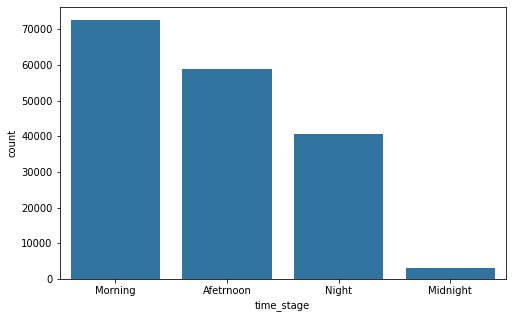

In [6]:
from fnmatch import fnmatchcase as match
time_stage = []
df['time'] = df.start_time.str.extract('(.*)\s{1}(.*)')[1]
# df['date'] = df.start_time.str.extract('(.*)\s{1}(.*)')[0]
# df['time'] = pd.to_datetime(df['time'])
# df['date'] = pd.to_datetime(df['date'])
df['time'].value_counts()
for time in df['time']:
    if match(time,'06*') or match(time,'07*') or match(time,'08*') or match(time,'09*') or match(time,'10*') or match(time,'11*') or match(time,'12*'):
        time_stage.append("Morning")
    elif match(time,'13*') or match(time,'14*') or match(time,'15*') or match(time,'16*') or match(time,'17*'):
        time_stage.append('Afetrnoon')
    elif match(time,'18*') or match(time,'19*') or match(time,'20*') or match(time,'21*') or match(time,'22*') or match(time,'23*'):
        time_stage.append('Night')
    elif match(time,'00*') or match(time,'01*') or match(time,'02*') or match(time,'03*') or match(time,'04*') or match(time,'05*'):
#         print(time)
        time_stage.append('Midnight')
df['time_stage'] = time_stage

order=df['time_stage'].value_counts().index
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='time_stage', color=base_color, order=order);


## (Visualization 2)

> Does the above depend on if a user is a subscriber or customer?

- Answer: The subscriber type is about eight times more than the customers.

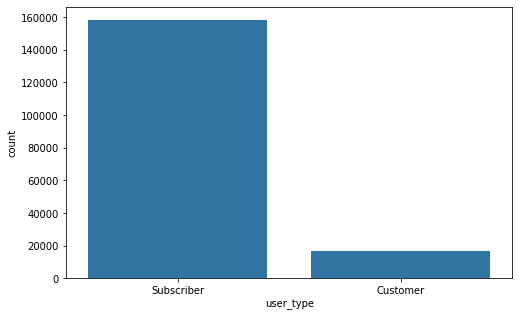

In [7]:
order=df['user_type'].value_counts().index
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color, order=order);


## (Visualization 3)
 Do most of the trips last more than one hours?


-Answer: No. Most of the trips last under one hour.

Text(0, 0.5, 'Propotion of no duration_sec ')

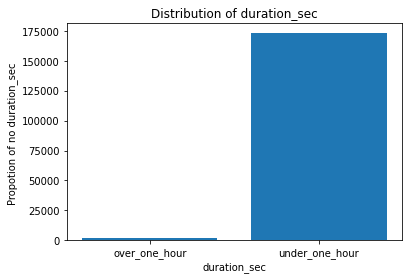

In [8]:
over_one_hour = len(df.query('duration_sec>3600'))
under_one_hour = len(df.query('duration_sec<=3600'))
plt.bar(['over_one_hour','under_one_hour'], [over_one_hour,under_one_hour])
plt.title("Distribution of duration_sec")
plt.xlabel("duration_sec")
plt.ylabel("Propotion of no duration_sec ")

## (Visualization 4)

> The relationship among time_stage, duration_sec, user_type

> Answer: The duration of the subscriber less than the customer. But the time_stage "morgning","afternoon","night", "midnight" do not affect the result.

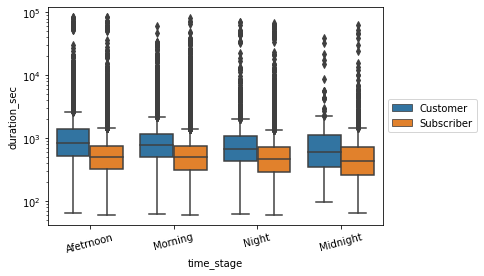

In [9]:

sb.boxplot(data=df,x = 'time_stage', y = 'duration_sec', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.yscale('log')

## (Visualization 5)
The relationship among time_stage, duration_sec, user_type and member_birth_year

Answer: The duration of the subscriber less than the customer.The most of users were born in about 1988. But the time_stage "morgning","afternoon","night", "midnight" do not affect the result. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Afetrnoon'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Night'),
  Text(3, 0, 'Midnight')])

<Figure size 1728x360 with 0 Axes>

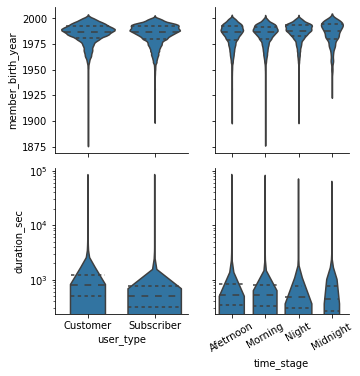

In [11]:
plt.figure(figsize=[24,5])
g = sb.PairGrid(data = df, x_vars = ['user_type', 'time_stage'],
                y_vars = ['member_birth_year','duration_sec'])
g.map(sb.violinplot, inner = 'quartile',color = base_color)

plt.yscale('log')
plt.xticks(rotation=30)

In [14]:
# !jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle
# !jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle
!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True slide_deck_template.ipynb

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!